In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [74]:
data=pd.read_csv("/content/Google_Stock_Price_Train.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Data is available in Kaggle website.

In [75]:
data.duplicated().sum()

0

In [76]:
#Treatment of Missing Values
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


From the above Ouput, it can be observed that Close and Volumne variables have object data type that means Python is storing these values in string format.

In [78]:
#Changing the Data types of Close and Volume columns
#data["Volume"][0].split(',')
temp=[]
for i in range(data.shape[0]):
  temp.append(int(re.sub('[,]', '',data["Volume"][i])))
temp1=pd.DataFrame(temp,columns=["int_Volume"])

The purpose of above code is to convert string values with commas to propert integer values.

In [80]:
data=pd.concat([data,temp1],axis=1)
data.head()

,Date,Open,High,Low,Close,Volume,int_Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500",7380500
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400",5749400
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300",6590300
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900",5405900
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800",11688800


Concatenation is used so that the new values that are saved in temporary dataframe can be shifted to a the source data.

In [84]:
data.drop("Volume",axis=1,inplace=True)

In [87]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1258 non-null   object 
 1   Open        1258 non-null   float64
 2   High        1258 non-null   float64
 3   Low         1258 non-null   float64
 4   Close       1258 non-null   object 
 5   int_Volume  1258 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 59.1+ KB


In [109]:
np.float64(data["Close"][0])

663.59

In [115]:
temp=[]
for i in range(data.shape[0]):
  temp.append(np.float64(re.sub('[,]', '',data["Close"][i])))
temp1=pd.DataFrame(temp,columns=["int_Close"])
data=pd.concat([data,temp1],axis=1).drop("Close",axis=1)

The same execution is done for Close feature. With cocatenation too.

In [117]:
data.head()

,Date,Open,High,Low,int_Volume,int_Close
0,1/3/2012,325.25,332.83,324.97,7380500,663.59
1,1/4/2012,331.27,333.87,329.08,5749400,666.45
2,1/5/2012,329.83,330.75,326.89,6590300,657.21
3,1/6/2012,328.34,328.77,323.68,5405900,648.24
4,1/9/2012,322.04,322.29,309.46,11688800,620.76


In [121]:
data["Date"]=pd.to_datetime(data["Date"])
data.head()

,Date,Open,High,Low,int_Volume,int_Close
0,2012-01-03,325.25,332.83,324.97,7380500,663.59
1,2012-01-04,331.27,333.87,329.08,5749400,666.45
2,2012-01-05,329.83,330.75,326.89,6590300,657.21
3,2012-01-06,328.34,328.77,323.68,5405900,648.24
4,2012-01-09,322.04,322.29,309.46,11688800,620.76


Time is also converted into it's proper format. Then internal values such as Days, Year and Months have been extracted out for further analysis and to make better models and to get better accuracy.

In [124]:
data["Year"]=data["Date"].dt.year
data["Month"]=data["Date"].dt.month
data["Day"]=data["Date"].dt.day

In [127]:
data.head()
data.drop("Date",axis=1,inplace=True)

In [130]:
data.head()

,Open,High,Low,int_Volume,int_Close,Year,Month,Day
0,325.25,332.83,324.97,7380500,663.59,2012,1,3
1,331.27,333.87,329.08,5749400,666.45,2012,1,4
2,329.83,330.75,326.89,6590300,657.21,2012,1,5
3,328.34,328.77,323.68,5405900,648.24,2012,1,6
4,322.04,322.29,309.46,11688800,620.76,2012,1,9


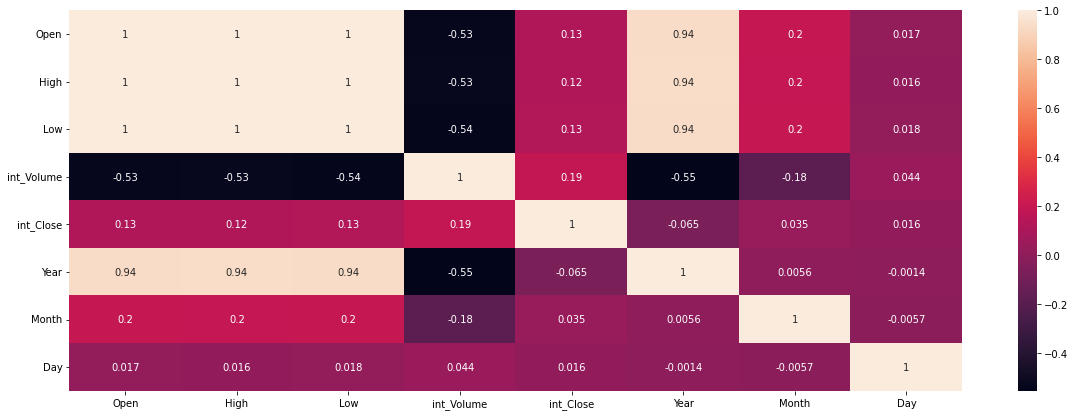

In [142]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True);

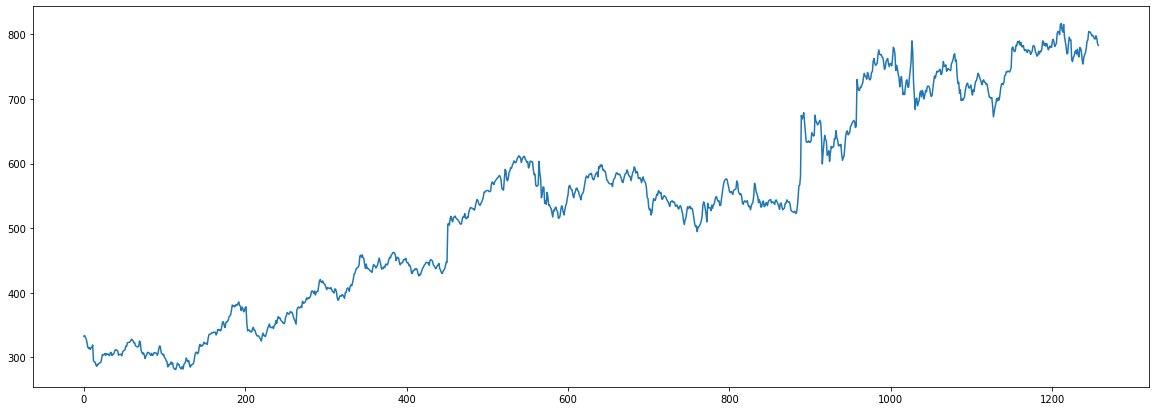

In [220]:
plt.figure(figsize=(20,7))
#plt.plot(data["int_Close"])
#plt.plot(data["Open"])
plt.plot(data["High"]);

In [194]:
X=data.loc[:,["Open","int_Close"]]
y=data["High"]
y

0       332.83
1       333.87
2       330.75
3       328.77
4       322.29
         ...  
1253    792.74
1254    797.86
1255    794.23
1256    785.93
1257    782.78
Name: High, Length: 1258, dtype: float64

For the very first execution I have picked Open and Close or int_Close feature becuase they are quite heavily correrelated.

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
#Standardizing the Data
scaling=StandardScaler()
X_train_sca=pd.DataFrame(scaling.fit_transform(X_train),columns=X_train.columns)
X_test_sca=pd.DataFrame(scaling.fit_transform(X_test),columns=X_train.columns)

From the below code, Artificial Neural Network is executed.

In [197]:
model=Sequential()

#First Layer
model.add(Dense(16,activation="relu",input_dim=2))

#Second Layer
model.add(Dense(units=32,activation="relu"))

#Third Layer
model.add(Dense(units=32,activation="relu"))

#Output Layer
model.add(Dense(units=1))

#Compiling the ANN
model.compile(optimizer="adam",loss="mean_squared_error",metrics=['mae','mse','mape'])

#Fitting the ANN to the training Dataset
model.fit(X_train_sca,y_train,batch_size=10,epochs=100)

Epoch 1/100
101/101 [==============================] - 1s 2ms/step - loss: 310444.9688 - mae: 535.6136 - mse: 310444.9688 - mape: 99.0662
Epoch 2/100
101/101 [==============================] - 0s 2ms/step - loss: 223848.7656 - mae: 438.1168 - mse: 223848.7656 - mape: 78.8496
Epoch 3/100
101/101 [==============================] - 0s 2ms/step - loss: 47622.2812 - mae: 179.9375 - mse: 47622.2852 - mape: 32.2758
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 7745.7578 - mae: 69.9174 - mse: 7745.7588 - mape: 15.4174
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 4573.4331 - mae: 49.3694 - mse: 4573.4331 - mape: 11.5152
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 3528.2378 - mae: 42.1984 - mse: 3528.2378 - mape: 9.9192
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 2713.4209 - mae: 36.6829 - mse: 2713.4209 - mape: 8.6555
Epoch 8/100
101/101 [==============================] - 0s 

In [198]:
model.evaluate(X_test_sca,y_test)

8/8 [==============================] - 0s 4ms/step - loss: 216.3451 - mae: 10.9333 - mse: 216.3451 - mape: 1.8030


[216.34512329101562, 10.93325424194336, 216.34512329101562, 1.8029556274414062]

In [199]:
y_pred=model.predict(X_test_sca)

8/8 [==============================] - 0s 2ms/step


In [200]:
y_test

561     564.88
101     298.45
51      311.79
63      322.77
1073    745.00
         ...  
156     335.87
549     601.67
398     451.07
243     360.97
834     553.68
Name: High, Length: 252, dtype: float64

In [201]:
r2=r2_score(y_test,y_pred)
r2

0.9906319467019463

In [202]:
def adjusted_r2(r2,X_train):
    return 1-((1-r2**2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))

In [203]:
adjusted_r2(r2,X_train_sca)

0.9813144686895516

From the above code blocks, it is clearly visible that the accuracy is quite good and also the value of adjusted r2 is also quite close to r2.

**ANN with all the independent Features**

In [206]:
X=data.drop("High",axis=1)
y=data["High"]
y

0       332.83
1       333.87
2       330.75
3       328.77
4       322.29
         ...  
1253    792.74
1254    797.86
1255    794.23
1256    785.93
1257    782.78
Name: High, Length: 1258, dtype: float64

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [210]:
#Standardizing the Data
scaling=StandardScaler()
X_train_sca=pd.DataFrame(scaling.fit_transform(X_train),columns=X_train.columns)
X_test_sca=pd.DataFrame(scaling.fit_transform(X_test),columns=X_train.columns)

In [212]:
model=Sequential()

#First Layer
model.add(Dense(16,activation="relu",input_dim=7))

#Second Layer
model.add(Dense(units=32,activation="relu"))

#Third Layer
model.add(Dense(units=32,activation="relu"))

#Output Layer
model.add(Dense(units=1))

#Compiling the ANN
model.compile(optimizer="adam",loss="mean_squared_error",metrics=['mae','mse','mape'])

#Fitting the ANN to the training Dataset
model.fit(X_train_sca,y_train,batch_size=10,epochs=100)

Epoch 1/100
101/101 [==============================] - 1s 2ms/step - loss: 312241.2812 - mae: 537.2578 - mse: 312241.2812 - mape: 99.3892
Epoch 2/100
101/101 [==============================] - 0s 2ms/step - loss: 242296.2500 - mae: 462.7794 - mse: 242296.2500 - mape: 83.8575
Epoch 3/100
101/101 [==============================] - 0s 2ms/step - loss: 46244.7656 - mae: 179.2700 - mse: 46244.7656 - mape: 33.4888
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 10372.4502 - mae: 85.4709 - mse: 10372.4502 - mape: 17.4649
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 5825.5737 - mae: 62.3731 - mse: 5825.5737 - mape: 13.0147
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 3913.8088 - mae: 50.2249 - mse: 3913.8088 - mape: 10.4134
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 2963.6562 - mae: 43.0889 - mse: 2963.6562 - mape: 8.8796
Epoch 8/100
101/101 [==============================] - 

In [213]:
model.evaluate(X_test_sca,y_test)

8/8 [==============================] - 1s 3ms/step - loss: 500.2848 - mae: 20.2201 - mse: 500.2848 - mape: 3.7188


[500.2847900390625, 20.220144271850586, 500.2847900390625, 3.7187931537628174]

In [214]:
y_pred=model.predict(X_test_sca)

8/8 [==============================] - 0s 9ms/step


In [215]:
r2=r2_score(y_test,y_pred)
r2

0.9783369557853453

In [219]:
adjusted_r2(r2,X_train_sca)

0.9568426002511156